# Setup


In [51]:
# !pip install opinionated
# !pip install pyalex
!pip install squarify

DEPRECATION: Loading egg at /Users/Noich001/anaconda3/lib/python3.11/site-packages/colormaps-0.4.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns



import opinionated
import matplotlib.pyplot as plt
plt.style.use("opinionated_rc")
import colormaps as cmaps





# Setup Pyalex:
from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers, Funders
import pyalex
pyalex.config.email = "maximilian.noichl@uni-bamberg.de"

from itertools import chain

In [43]:
# prompt: set pandas to show all columns

import pandas as pd
pd.set_option('display.max_columns', None)


# Get Crossref replication-data

In [44]:
!git clone https://gitlab.com/crossref/retraction-watch-data


fatal: destination path 'retraction-watch-data' already exists and is not an empty directory.


In [77]:
df = pd.read_csv('retraction-watch-data/retraction_watch.csv')
df

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
0,58412,Toward a sustainable environment: nexus betwee...,(B/T) Business - Economics;(B/T) Technology;(E...,Faculty of Economics and Administrative Scienc...,Environmental Science and Pollution Research,Springer,Turkey;United Kingdom,Tomiwa Sunday Adebayo;Festus Fatai Adedoyin;De...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34259-w,38969899.0,5/18/2021 0:00,10.1007/s11356-021-14425-0,34003441.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN
1,58410,The step towards environmental mitigation in P...,(B/T) Business - Economics;(ENV) Environmental...,"Business Studies Department, Bahria Business S...",Environmental Science and Pollution Research,Springer,Iraq;Malaysia;Pakistan;Vietnam,Danish Iqbal Godil;Paiman Ahmad;Muhammad Sajja...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34261-2,38969887.0,1/7/2021 0:00,10.1007/s11356-020-11839-0,33415625.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN
2,58408,The impact of COVID-19 on small- and medium-si...,(B/T) Business - Economics;(ENV) Environmental...,"Sichuan Tourism University, Chengdu, China; Fa...",Environmental Science and Pollution Research,Springer,China;Pakistan,Lijie Du;Asif Razzaq;Muhammad Waqas,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34262-1,38969888.0,8/2/2022 0:00,10.1007/s11356-022-22221-7,35917071.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN
3,58405,The detoxification of heavy metals from aqueou...,(ENV) Environmental Sciences;(ENV) Ground/Surf...,"Department of Physics, Faculty of Science, Uni...",Environmental Science and Pollution Research,Springer,Pakistan,Muhammad Bilal Tahir;Habiba Kiran;Tahir Iqbal,https://retractionwatch.com/2024/08/22/sleuths...,Review Article;,7/5/2024 0:00,10.1007/s11356-024-34257-y,38967852.0,3/5/2019 0:00,10.1007/s11356-019-04547-x,30835072.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,NaN
4,58404,The asymmetric effects of renewable energy con...,(B/T) Business - Economics;(ENV) Environmental...,"Department of Business Administration, Faculty...",Environmental Science and Pollution Research,Springer,Nigeria;Turkey,Sunday Adebayo;Husam Rjoub;Gbenga Daniel Akins...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34289-4,38969896.0,8/6/2021 0:00,10.1007/s11356-021-15706-4,34363156.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57811,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha Aggarwal;Kellie M D'...,http://retractionwatch.com/2015/11/23/jama-ret...,Clinical Study;Research Article;,12/22/2015 0:00,10.1001/jama.2015.16678,26594834.0,10/3/2007 0:00,10.1001/jama.298.13.1539,1791149.0,Retraction,+Falsification/Fabrication of Data;+Investigat...,No,NaN
57812,4,MtvR is a global small noncoding regulatory RN...,(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,Institute for Biotechnology and Bioengineering...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;André M Grilo;Paulo J P da C...,http://retractionwatch.com/2014/11/03/post-doc...,Research Article;,11/1/2014 0:00,10.1128/JB.02299-14,25319527.0,5/31/2013 0:00,10.1128/JB.00242-13,2372964.0,Retraction,+Duplication of Image;+Manipulation of Images;,No,exact date of retraction unknown
57813,3,"The s

# Plot some basic stats

/Users/Noich001/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


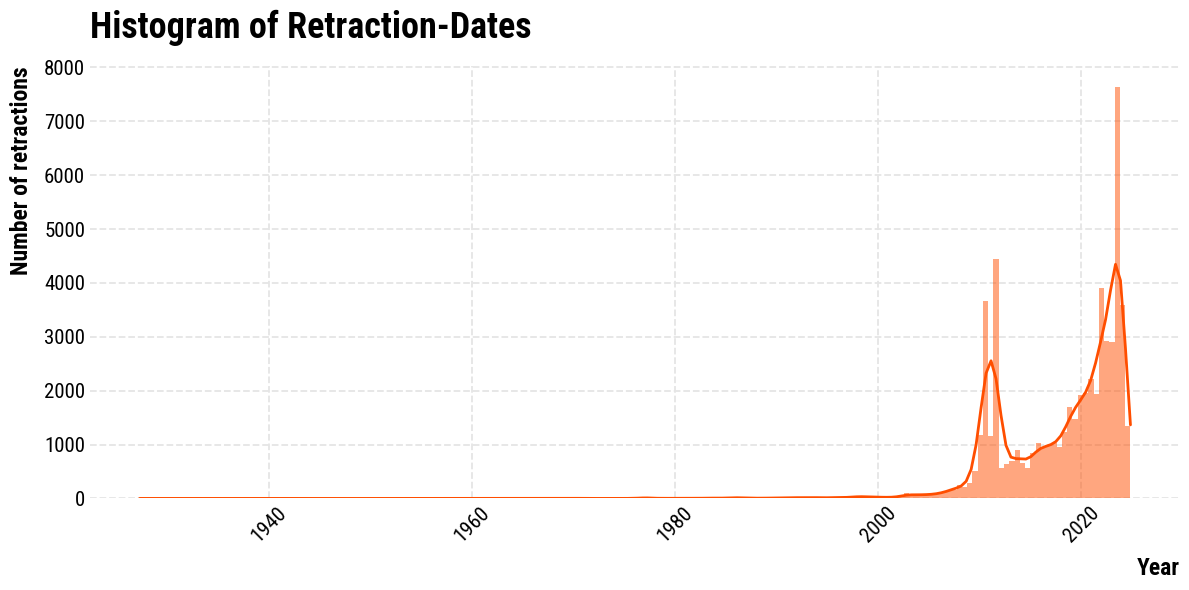

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def parse_date(date_string):
    try:
        return pd.to_datetime(date_string, format='%m/%d/%Y %H:%M')
    except ValueError:
        try:
            return pd.to_datetime(date_string, format='%m/%d/%Y %I:%M %p')
        except ValueError:
            # If both attempts fail, return NaT (Not a Time)
            return pd.NaT


# First, convert the date column to datetime type if it's not already
df['retraction_date_column'] = df['RetractionDate'].apply(parse_date)
df['retraction_date_column'] = pd.to_datetime(df['retraction_date_column'], format='%m/%d/%Y %H:%M')


# Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='retraction_date_column', kde=True, color='#ff4e00', edgecolor=None, line_kws={'linewidth': 2, 'color': 'black'})


# Customize the plot
plt.title('Histogram of Retraction-Dates')
plt.xlabel('Year')
plt.ylabel('Number of retractions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()


In [79]:
df['publication_date_column'] = df['OriginalPaperDate'].apply(parse_date)
df['publication_date_column'] = pd.to_datetime(df['publication_date_column'], format='%m/%d/%Y %H:%M')


/Users/Noich001/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


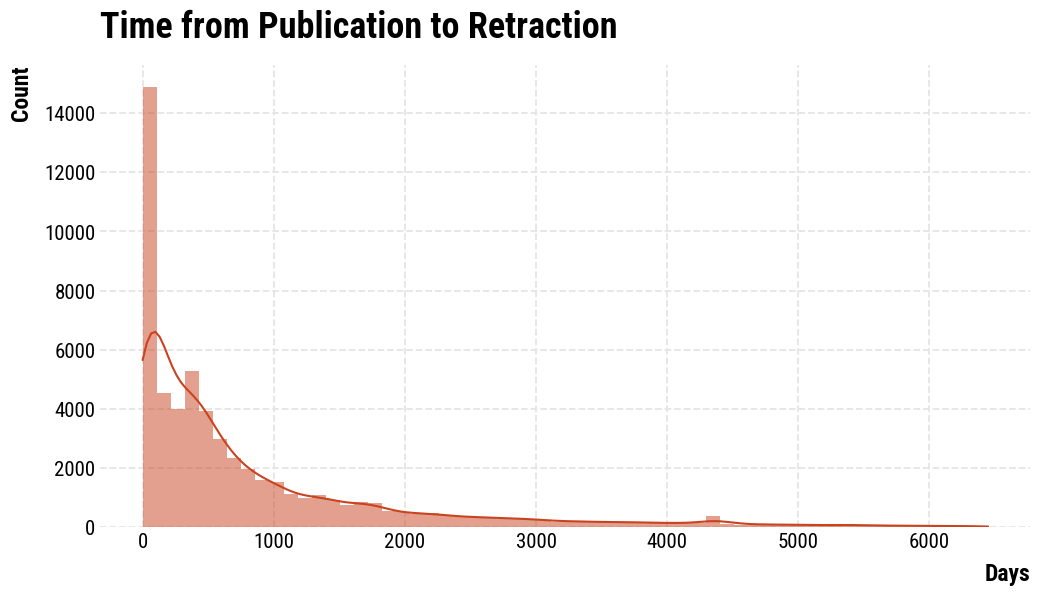

In [80]:
# Calculate the time difference in days
df['time_to_retraction'] = (df['retraction_date_column'] - df['publication_date_column']).dt.days

# Create the histogram using seaborn
plt.figure(figsize=(12, 6))

# Filter out infinite values and very extreme outliers
filtered_df = df[
    (df['time_to_retraction'].notna()) & 
    (df['time_to_retraction'] > -360) &
    (df['time_to_retraction'] < df['time_to_retraction'].quantile(0.99))  # Remove extreme outliers
]

sns.histplot(
    data=filtered_df, 
    x='time_to_retraction', 
    kde=True, 
    bins=60, 
    color="#c9431e", 
    edgecolor=None
)

plt.title('Time from Publication to Retraction')
plt.xlabel('Days')
plt.ylabel('Count')

# Display the plot
plt.show()

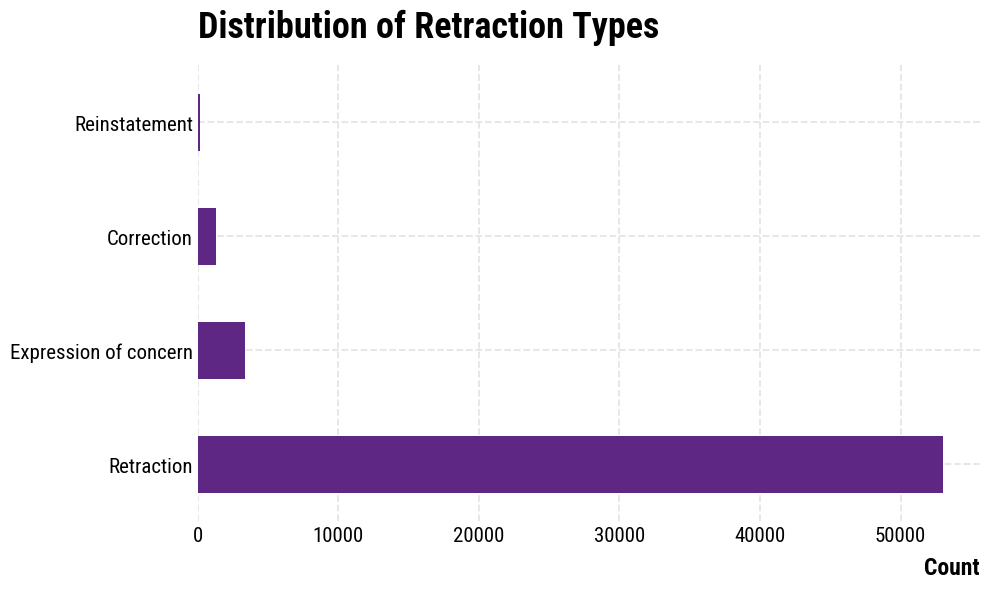

RetractionNature
Retraction               53001
Expression of concern     3378
Correction                1294
Reinstatement              143
Name: count, dtype: int64

In [81]:
# Create a horizontal bar plot of RetractionNature counts
plt.figure(figsize=(10, 6))
df['RetractionNature'].value_counts().plot(kind='barh', color='#5e2784')

# Customize the plot
plt.title('Distribution of Retraction Types')
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()  # Adjust layout to prevent label cutoff

# Display the plot
plt.show()

# Also display the actual counts
display(df['RetractionNature'].value_counts())

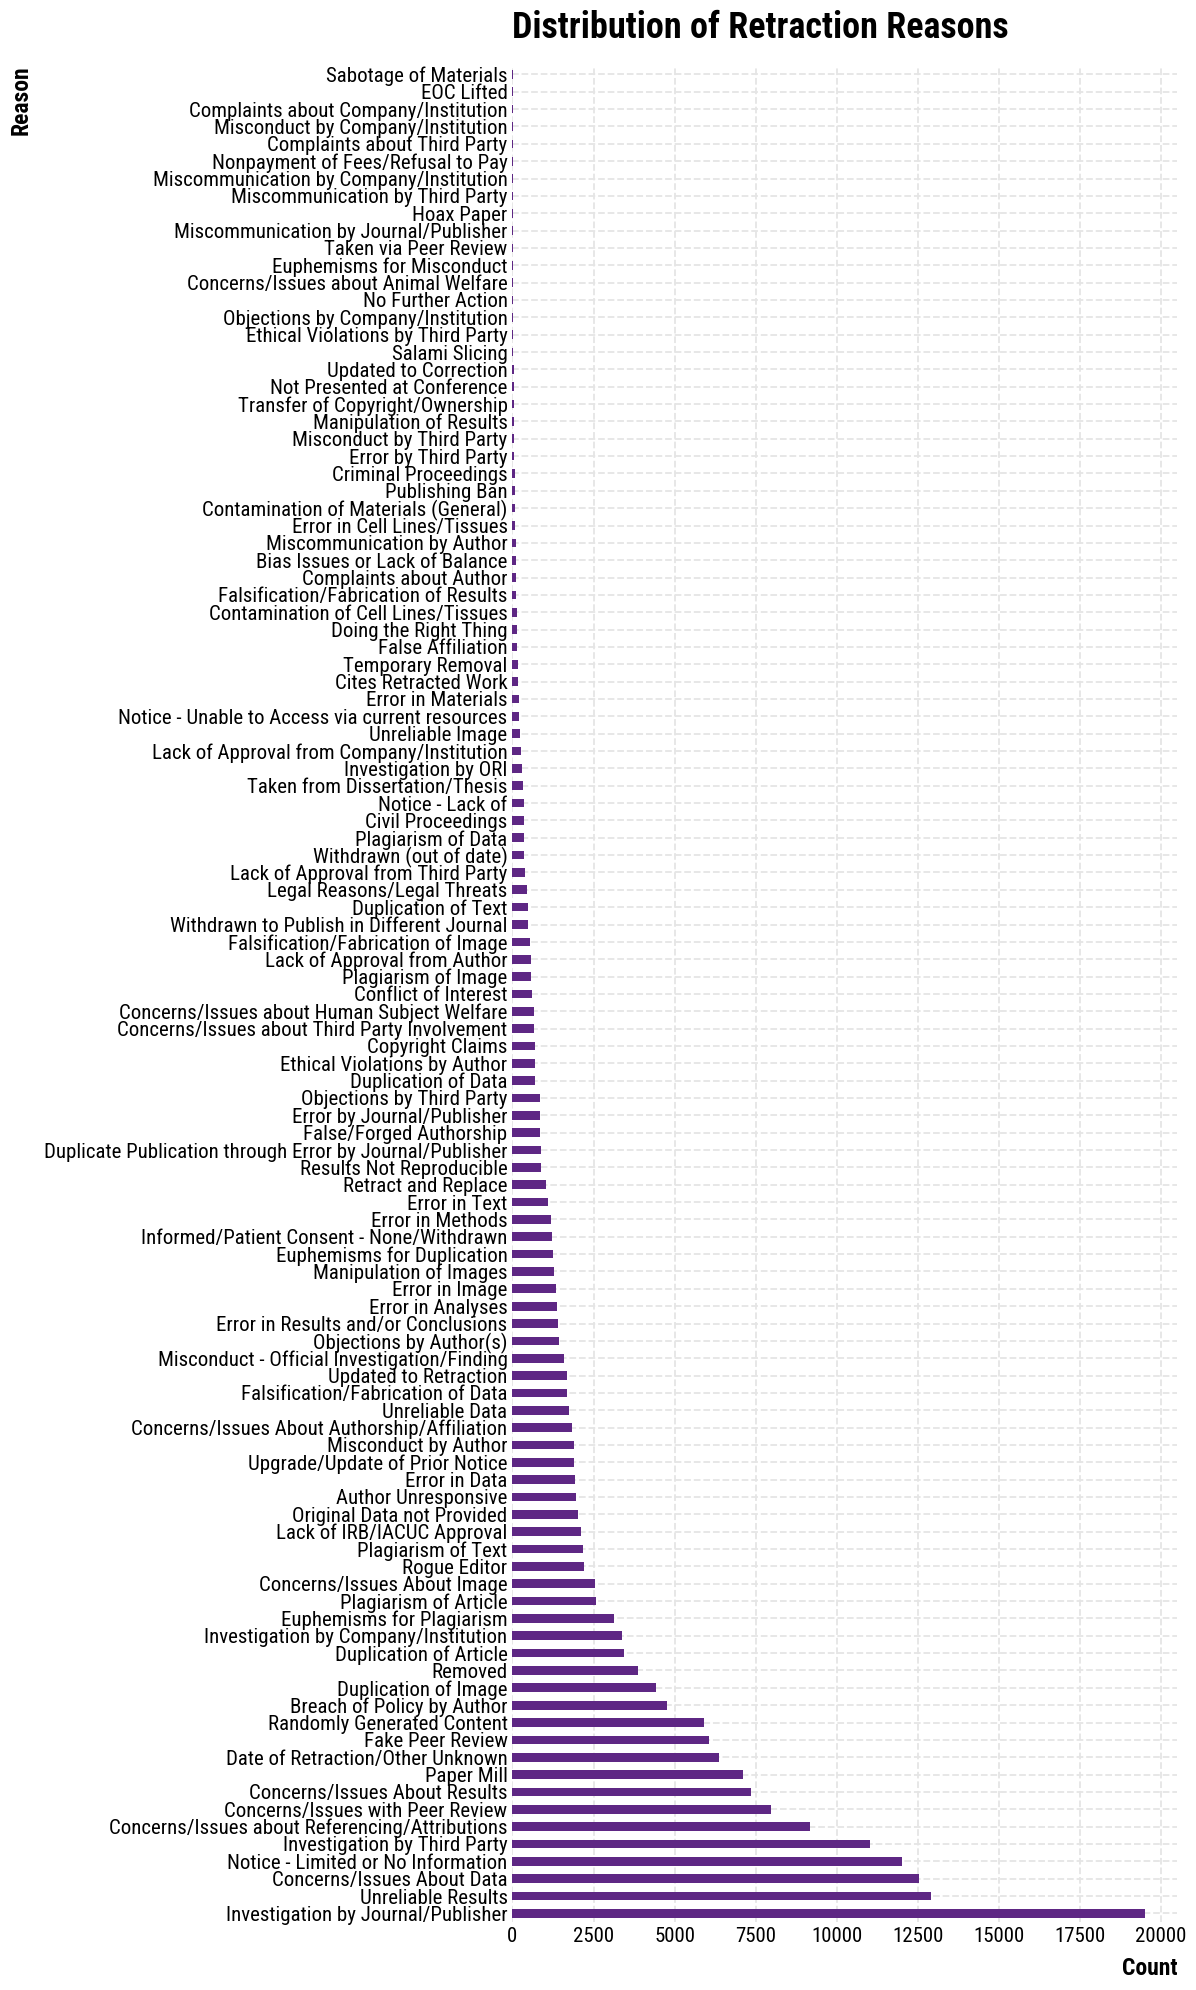

Reason
Investigation by Journal/Publisher      19527
Unreliable Results                      12906
Concerns/Issues About Data              12538
Notice - Limited or No Information      12027
Investigation by Third Party            11042
                                        ...  
Complaints about Third Party               10
Misconduct by Company/Institution           8
Complaints about Company/Institution        4
EOC Lifted                                  2
Sabotage of Materials                       1
Name: count, Length: 107, dtype: int64

In [82]:
# Split the strings and flatten the list
all_reasons = df['Reason'].str.split(';').explode()

# Clean up the reasons (remove '+' and strip whitespace)
all_reasons = all_reasons.str.replace('+', '').str.strip()
all_reasons = all_reasons[all_reasons.notna() & (all_reasons != '')]

# Count frequencies and sort
reason_counts = all_reasons.value_counts()

# Create horizontal bar plot
plt.figure(figsize=(12, 20))
reason_counts.plot(kind='barh', color='#5e2784')

# Customize the plot
plt.title('Distribution of Retraction Reasons')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.tight_layout()

# Display the plot
plt.show()

# Also display the actual counts
display(reason_counts)

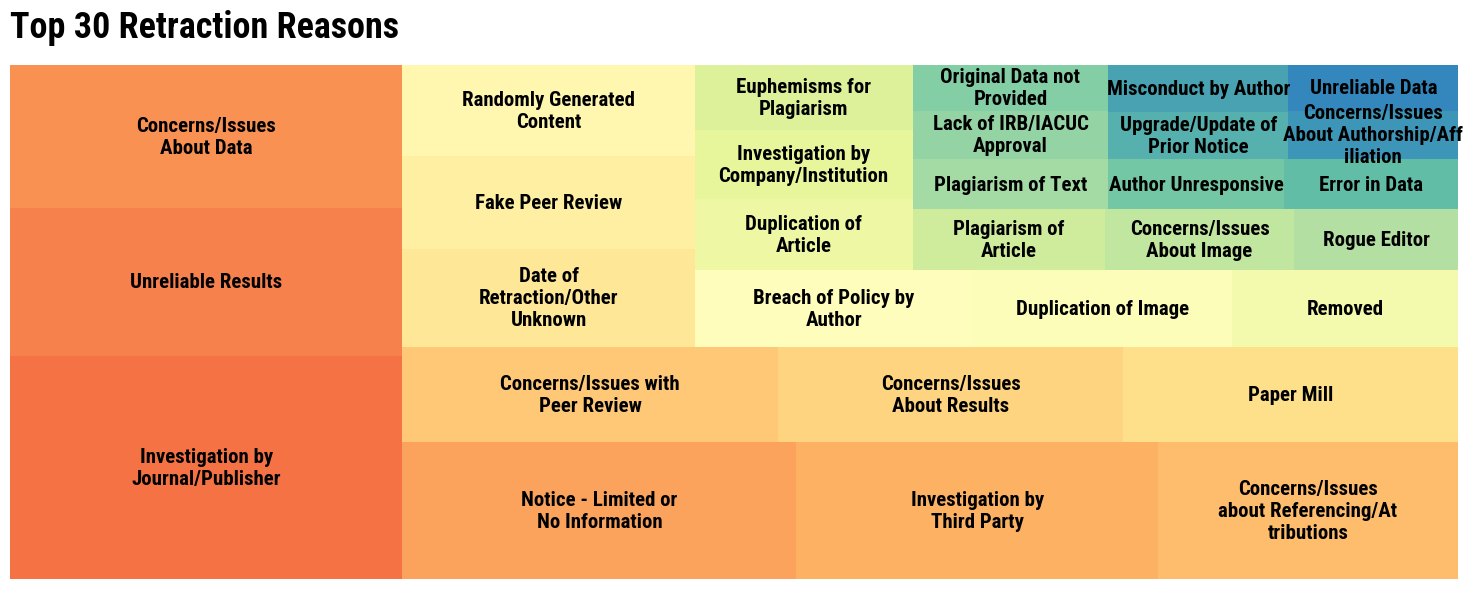

Reason
Investigation by Journal/Publisher                19527
Unreliable Results                                12906
Concerns/Issues About Data                        12538
Notice - Limited or No Information                12027
Investigation by Third Party                      11042
Concerns/Issues about Referencing/Attributions     9172
Concerns/Issues with Peer Review                   7982
Concerns/Issues About Results                      7349
Paper Mill                                         7121
Date of Retraction/Other Unknown                   6372
Fake Peer Review                                   6056
Randomly Generated Content                         5914
Breach of Policy by Author                         4776
Duplication of Image                               4442
Removed                                            3884
Duplication of Article                             3433
Investigation by Company/Institution               3366
Euphemisms for Plagiarism                

In [83]:
import squarify
import textwrap

# Split and clean the reasons as before
all_reasons = df['Reason'].str.split(';').explode()
all_reasons = all_reasons.str.replace('+', '').str.strip()
all_reasons = all_reasons[all_reasons.notna() & (all_reasons != '')]
reason_counts = all_reasons.value_counts()
# Get top 30 reasons
top_30 = reason_counts.head(30)

# Create figure
plt.figure(figsize=(15, 6))


wrapped_labels = ['\n'.join(textwrap.wrap(label, width=20)) for label in top_30.index]

# Create treemap
squarify.plot(sizes=top_30.values,
              label=wrapped_labels,
              alpha=1.,
              color=plt.cm.Spectral(np.linspace(0.21, .9, len(top_30))),
              text_kwargs={'fontsize':15, 'fontweight': 'bold'})

# Customize plot
plt.axis('off')
plt.title('Top 30 Retraction Reasons', pad=20)

# Display the plot
plt.tight_layout()
plt.show()

# Also display the counts
display(top_30)

In [84]:
df[df['Reason'].str.contains('Hoax')]

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,retraction_date_column,publication_date_column,time_to_retraction
7288,50885,Left-Handed Mothers and LGBTQ+ Child Acceptanc...,(SOC) Psychology;(SOC) Sexual And Marital Stud...,"Centre for Human Discovery, University of Simi...","Journal of Education, Society and Behavioural ...",ScienceDomain International,Singapore,Jin Rabak;Hen Guai Lan,NaN,Research Article;,1/10/2024 0:00,10.9734/jesbs/2023/v36i41216,0.0,3/14/2023 0:00,10.9734/jesbs/2023/v36i41216,0.0,Retraction,+Date of Retraction/Other Unknown;+Hoax Paper;...,No,"date of retraction unknown, html page overwrit...",2024-01-10,2023-03-14,302.0
18002,40126,"Mitochondria: Structure, Function and Clinical...",(BLS) Biology - Cellular;,"Department of Medical Cell Biology, University...",International Journal of Molecular Biology: Op...,MedCrave,Canada,Lucas McGeorge;Annette Kin,NaN,Review Article;,7/14/2017 0:00,unavailable,0.0,7/14/2017 0:00,10.15406/ijmboa.2017.02.00029,0.0,Retraction,+False Affiliation;+False/Forged Authorship;+H...,No,see: https://www.discovermagazine.com/mind/pre...,2017-07-14,2017-07-14,0.0
23623,34471,Donor money and the academy: Perceptions of un...,(B/T) Business - Economics;(SOC) Education;,"Department of Economics, University of Califor...",Higher Education Quarterly,Wiley,United States,Sage Owens;Kal Avers-Lynde III,NaN,Research Article;,12/2/2021 0:00,10.1111/hequ.12360,0.0,10/25/2021 0:00,10.1111/hequ.12360,0.0,Retraction,+Date of Retraction/Other Unknown;+Falsificati...,No,"date of retracted unknown, html page overwrite...",2021-12-02,2021-10-25,38.0
34043,24022,SARS-CoV-2 was Unexpectedly Deadlier than Push...,(HSC) Biostatistics/Epidemiology;(HSC) Medicin...,Belgian Institute of Technology and Education ...,Asian Journal of Medicine and Health,Asian Journal of Medicine and Health,Belgium;East Timor;France;Switzerland,Willard Oodendijk;Michaël Rochoy;Valentin Rugg...,http://retractionwatch.com/2020/08/16/hydroxyc...,Research Article;,8/16/2020 0:00,unavailable,0.0,8/15/2020 0:00,10.9734/AJMAH/2020/v18i930232,0.0,Retraction,+Hoax Paper;,No,NaN,2020-08-16,2020-08-15,1.0
37765,20282,Going in Through the Back Door: Challenging St...,(SOC) Sexual And Marital Studies;(SOC) Sociology;,Portland Ungendering Research Initiative (PURI...,Sexuality & Culture,Springer,United States,M Smith;Peter Boghossian;Helen Pluckrose;James...,http://retractionwatch.com/?s=Boghossian,Research Article;,12/1/2018 0:00,10.1007/s12119-018-9536-0,0.0,6/16/2018 0:00,10.1007/s12119-018-9536-0,0.0,Retraction,+Concerns/Issues About Authorship/Affiliation;...,No,M Smith and PURI are false names used by the o...,2018-12-01,2018-06-16,168.0
38432,19613,An Ethnography of Breastaurant Masculinity: Th...,(SOC) Sociology;,"Department of History, Gulf Coast State Colleg...",Sex Roles,Springer,United States,Richard Baldwin;Peter Boghossian;Helen Pluckro...,http://retractionwatch.com/?s=Peter+Boghossian,Research Article;,12/1/2018 0:00,10.1007/s11199-018-0962-0,0.0,9/19/2018 0:00,10.1007/s11199-018-0962-0,0.0,Retraction,+Date of Retraction/Other Unknown;+Hoax Paper;,No,"Actually authored by: Peter Boghossian, Helen ...",2018-12-01,2018-09-19,73.0
38762,19281,Who are they to judge? Overcoming anthropometr...,(SOC) Psychology;(SOC) Sociology;,Gulf Coast State College,Fat Studies,Taylor and Francis,United States,Richard Baldwin,NaN,Research Article;,11/1/2018 0:00,10.1080/21604851.2018.1453622,0.0,4/10/2018 0:00,10.1080/21604851.2018.1453622,0.0,Retraction,+Hoax Paper;+Investigation by Journal/Publishe...,No,See also: https://areomagazine.com/2018/10/02/...,2018-11-01,2018-04-10,205.0
38763,19280,Human reactions to rape culture and queer perf...,(BLS) Zoology;(SOC) Sociology;,Portland Ungendering Research Initiative (PUR ...,"Gender, Place & Culture",Taylor and Fra

# Link with OpenAlex

In [85]:
df=df.dropna(subset=['OriginalPaperDOI'])
set([type(x) for x in df['OriginalPaperDOI']])

{str}

In [86]:
from pyalex import Works
from tqdm import tqdm

def get_records_from_dois(doi_list, block_size=99):
    all_records = []
    for i in tqdm(range(0, len(doi_list), block_size)):
        sublist = doi_list[i:i+block_size]
        doi_str = "|".join(sublist)
        record_list = Works().filter(doi=doi_str).get(per_page=block_size)
        all_records.extend(record_list)
    return all_records



OA_records_df = pd.DataFrame(get_records_from_dois(df['OriginalPaperDOI']))

# Display the number of additional records retrieved
print(f"Number of additional records retrieved: {len(OA_records_df)}")

display(OA_records_df)

100%|██████████| 559/559 [03:37<00:00,  2.57it/s]


Number of additional records retrieved: 50165


,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,type_crossref,indexed_in,open_access,authorships,institution_assertions,countries_distinct_count,institutions_distinct_count,corresponding_author_ids,corresponding_institution_ids,apc_list,apc_paid,fwci,has_fulltext,cited_by_count,citation_normalized_percentile,cited_by_percentile_year,biblio,is_retracted,is_paratext,primary_topic,topics,keywords,concepts,mesh,locations_count,locations,best_oa_location,sustainable_development_goals,grants,datasets,versions,referenced_works_count,referenced_works,related_works,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date,fulltext_origin,is_authors_truncated
0,https://openalex.org/W3187731274,https://doi.org/10.1007/s11356-021-15706-4,The asymmetric effects of renewable energy con...,The asymmetric effects of renewable energy con...,2021,2021-08-06,{'openalex': 'https://openalex.org/W3187731274...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,journal-article,"[crossref, pubmed]","{'is_oa': False, 'oa_status': 'closed', 'oa_ur...","[{'author_position': 'first', 'author': {'id':...",[],2,3,[https://openalex.org/A5029542243],[https://openalex.org/I16197041],"{'value': 2890, 'currency': 'EUR', 'value_usd'...",None,38.926,False,204,"{'value': 0.99998, 'is_in_top_1_percent': True...","{'min': 99, 'max': 100}","{'volume': '29', 'issue': '2', 'first_page': '...",False,False,"{'id': 'https://openalex.org/T10438', 'display...","[{'id': 'https://openalex.org/T10438', 'displa...",[{'id': 'https://openalex.org/keywords/quantil...,"[{'id': 'https://openalex.org/C63817138', 'wik...","[{'descriptor_ui': 'D002244', 'descriptor_name...",2,"[{'is_oa': False, 'landing_page_url': 'https:/...",None,"[{'id': 'https://metadata.un.org/sdg/7', 'disp...",[],[],[],63,"[https://openalex.org/W1507259579, https://ope...","[https://openalex.org/W4388704167, https://ope...",None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 36}, {'year'...",2024-11-07T18:45:15.485561,2021-08-16,NaN,NaN
1,https://openalex.org/W3207077335,https://doi.org/10.1007/s11356-021-16849-0,Asymmetric nexus among financial globalization...,Asymmetric nexus among financial globalization...,2021,2021-10-14,{'openalex': 'https://openalex.org/W3207077335...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,journal-article,"[crossref, pubmed]","{'is_oa': False, 'oa_status': 'closed', 'oa_ur...","[{'author_position': 'first', 'author': {'id':...",[],2,1,[https://openalex.org/A5081479024],[],"{'value': 2890, 'currency': 'EUR', 'value_usd'...",None,27.538,False,145,"{'value': 0.99998, 'is_in_top_1_percent': True...","{'min': 99, 'max': 100}","{'volume': '29', 'issue': '11', 'first_page': ...",False,False,"{'id': 'https://openalex.org/T10438', 'display...","[{'id': 'https://openalex.org/T10438', 'displa...",[{'id': 'https://openalex.org/keywords/green-g...,"[{'id': 'https://openalex.org/C47737302', 'wik...","[{'descriptor_ui': 'D044822', 'descriptor_name...",2,"[{'is_oa': False, 'landing_page_url': 'https:/...",None,"[{'id': 'https://metadata.un.org/sdg/12', 'dis...",[],[],[],58,"[https://openalex.org/W1507259579, https://ope...","[https://openalex.org/W4256360871, https://ope...",None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 42}, {'year'...",2024-11-02T06:58:24.174665,2021-10-25,NaN,NaN
2,https://openalex.org/W2920581951,https://doi.org/10.1007/s11356-019-04547-x,The detoxification of heavy metals from aqueou...,The detoxification of heavy metals from aqueou...,2019,2019-03-05,{'openalex': 'https://openalex.org/W2920581951...,en,"{'is_oa': False, 'landing_page_url': 'https://...",review,journal-article,"[crossref, pubmed]","{'is_oa': False, 'oa_status': 'closed', 'oa_ur...","[{'author_position': 'first', 'author': {'id':...",[],1,1,[https://openalex.org/A5054599473],[https://openalex.org/I99165933],"{'value': 2890, 'curren

In [87]:
from compress_pickle import dump, load

dump(OA_records_df, 'intermediate_data/DOI_matched_OA_data_of_retracted_studies.bz2')

# OA_records_df = load('intermediate_data/DOI_matched_OA_data_of_retracted_studies.bz2')

In [91]:
OA_records_df

,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,type_crossref,indexed_in,open_access,authorships,institution_assertions,countries_distinct_count,institutions_distinct_count,corresponding_author_ids,corresponding_institution_ids,apc_list,apc_paid,fwci,has_fulltext,cited_by_count,citation_normalized_percentile,cited_by_percentile_year,biblio,is_retracted,is_paratext,primary_topic,topics,keywords,concepts,mesh,locations_count,locations,best_oa_location,sustainable_development_goals,grants,datasets,versions,referenced_works_count,referenced_works,related_works,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date,fulltext_origin,is_authors_truncated
0,https://openalex.org/W3187731274,https://doi.org/10.1007/s11356-021-15706-4,The asymmetric effects of renewable energy con...,The asymmetric effects of renewable energy con...,2021,2021-08-06,{'openalex': 'https://openalex.org/W3187731274...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,journal-article,"[crossref, pubmed]","{'is_oa': False, 'oa_status': 'closed', 'oa_ur...","[{'author_position': 'first', 'author': {'id':...",[],2,3,[https://openalex.org/A5029542243],[https://openalex.org/I16197041],"{'value': 2890, 'currency': 'EUR', 'value_usd'...",None,38.926,False,204,"{'value': 0.99998, 'is_in_top_1_percent': True...","{'min': 99, 'max': 100}","{'volume': '29', 'issue': '2', 'first_page': '...",False,False,"{'id': 'https://openalex.org/T10438', 'display...","[{'id': 'https://openalex.org/T10438', 'displa...",[{'id': 'https://openalex.org/keywords/quantil...,"[{'id': 'https://openalex.org/C63817138', 'wik...","[{'descriptor_ui': 'D002244', 'descriptor_name...",2,"[{'is_oa': False, 'landing_page_url': 'https:/...",None,"[{'id': 'https://metadata.un.org/sdg/7', 'disp...",[],[],[],63,"[https://openalex.org/W1507259579, https://ope...","[https://openalex.org/W4388704167, https://ope...",None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 36}, {'year'...",2024-11-07T18:45:15.485561,2021-08-16,NaN,NaN
1,https://openalex.org/W3207077335,https://doi.org/10.1007/s11356-021-16849-0,Asymmetric nexus among financial globalization...,Asymmetric nexus among financial globalization...,2021,2021-10-14,{'openalex': 'https://openalex.org/W3207077335...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,journal-article,"[crossref, pubmed]","{'is_oa': False, 'oa_status': 'closed', 'oa_ur...","[{'author_position': 'first', 'author': {'id':...",[],2,1,[https://openalex.org/A5081479024],[],"{'value': 2890, 'currency': 'EUR', 'value_usd'...",None,27.538,False,145,"{'value': 0.99998, 'is_in_top_1_percent': True...","{'min': 99, 'max': 100}","{'volume': '29', 'issue': '11', 'first_page': ...",False,False,"{'id': 'https://openalex.org/T10438', 'display...","[{'id': 'https://openalex.org/T10438', 'displa...",[{'id': 'https://openalex.org/keywords/green-g...,"[{'id': 'https://openalex.org/C47737302', 'wik...","[{'descriptor_ui': 'D044822', 'descriptor_name...",2,"[{'is_oa': False, 'landing_page_url': 'https:/...",None,"[{'id': 'https://metadata.un.org/sdg/12', 'dis...",[],[],[],58,"[https://openalex.org/W1507259579, https://ope...","[https://openalex.org/W4256360871, https://ope...",None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 42}, {'year'...",2024-11-02T06:58:24.174665,2021-10-25,NaN,NaN
2,https://openalex.org/W2920581951,https://doi.org/10.1007/s11356-019-04547-x,The detoxification of heavy metals from aqueou...,The detoxification of heavy metals from aqueou...,2019,2019-03-05,{'openalex': 'https://openalex.org/W2920581951...,en,"{'is_oa': False, 'landing_page_url': 'https://...",review,journal-article,"[crossref, pubmed]","{'is_oa': False, 'oa_status': 'closed', 'oa_ur...","[{'author_position': 'first', 'author': {'id':...",[],1,1,[https://openalex.org/A5054599473],[https://openalex.org/I99165933],"{'value': 2890, 'curren

# Merge datasets

Merging looses 10k papers. Why?!

In [101]:
# First, let's check for duplicates
print("Duplicate DOIs in original df:", df['OriginalPaperDOI'].duplicated().sum())
print("Duplicate DOIs in OA records:", OA_records_df['doi_to_merge'].duplicated().sum())

# Fix the merge to keep only unique records
OA_records_df['doi_to_merge'] = OA_records_df['doi'].str.replace('https://doi.org/', '')
# Drop duplicates in OpenAlex records before merging
OA_records_df_unique = OA_records_df.drop_duplicates(subset='doi_to_merge')
df_unique = df.drop_duplicates(subset='OriginalPaperDOI')

# Perform the merge with unique records
merged_df = df_unique.merge(OA_records_df_unique, 
                    left_on='OriginalPaperDOI', 
                    right_on='doi_to_merge', 
                    how='inner')

print("\nShape of original df:", df.shape)
print("Shape of OA records:", OA_records_df_unique.shape)
print("Shape of merged df:", merged_df.shape)

# Display the merged dataframe
display(merged_df)

Duplicate DOIs in original df: 5965
Duplicate DOIs in OA records: 1292

Shape of original df: (55278, 23)
Shape of OA records: (48873, 52)
Shape of merged df: (36263, 75)


,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,retraction_date_column,publication_date_column,time_to_retraction,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,type_crossref,indexed_in,open_access,authorships,institution_assertions,countries_distinct_count,institutions_distinct_count,corresponding_author_ids,corresponding_institution_ids,apc_list,apc_paid,fwci,has_fulltext,cited_by_count,citation_normalized_percentile,cited_by_percentile_year,biblio,is_retracted,is_paratext,primary_topic,topics,keywords,concepts,mesh,locations_count,locations,best_oa_location,sustainable_development_goals,grants,datasets,versions,referenced_works_count,referenced_works,related_works,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date,fulltext_origin,is_authors_truncated,doi_to_merge
0,58412,Toward a sustainable environment: nexus betwee...,(B/T) Business - Economics;(B/T) Technology;(E...,Faculty of Economics and Administrative Scienc...,Environmental Science and Pollution Research,Springer,Turkey;United Kingdom,Tomiwa Sunday Adebayo;Festus Fatai Adedoyin;De...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34259-w,38969899.0,5/18/2021 0:00,10.1007/s11356-021-14425-0,34003441.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN,2024-07-06,2021-05-18,1145.0,https://openalex.org/W3163122318,https://doi.org/10.1007/s11356-021-14425-0,RETRACTED ARTICLE: Toward a sustainable enviro...,RETRACTED ARTICLE: Toward a sustainable enviro...,2021,2021-05-18,{'openalex': 'https://openalex.org/W3163122318...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,journal-article,"[crossref, pubmed]","{'is_oa': True, 'oa_status': 'green', 'oa_url'...","[{'author_position': 'first', 'author': {'id':...",[],3,3,[https://openalex.org/A5029542243],[https://openalex.org/I16197041],"{'value': 2890, 'currency': 'EUR', 'value_usd'...",None,16.771,False,87,"{'value': 0.99998, 'is_in_top_1_percent': True...","{'min': 98, 'max': 99}","{'volume': '28', 'issue': '37', 'first_page': ...",False,False,"{'id': 'https://openalex.org/T10438', 'display...","[{'id': 'https://openalex.org/T10438', 'displa...",[{'id': 'https://openalex.org/keywords/environ...,"[{'id': 'https://openalex.org/C148609458', 'wi...","[{'descriptor_ui': 'D001938', 'descriptor_name...",3,"[{'is_oa': False, 'landing_page_url': 'https:/...","{'is_oa': True, 'landing_page_url': 'http://ep...",[],[],[],[],59,"[https://openalex.org/W1966910378, https://ope...","[https://openalex.org/W4256360871, https://ope...","{'This': [0], 'research': [1], 'investigates':...",https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 21}, {'year'...",2024-10-29T12:06:31.389238,2021-05-24,NaN,NaN,10.1007/s11356-021-14425-0
1,58410,The step towards environmental mitigation in P...,(B/T) Business - Economics;(ENV) Environmental...,"Business Studies Department, Bahria Business S...",Environmental Science and Pollution Research,Springer,Iraq;Malaysia;Pakistan;Vietnam,Danish Iqbal Godil;Paiman Ahmad;Muhammad Sajja...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34261-2,38969887.0,1/7/2021 0:00,10.1007/s11356-020-11839-0,33415625.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN,2024-07-06,2021-01-07,1276.0,https://openalex.org/W3120082529,https://doi.org/10.1007/s11356-020-11839-0,The step towards environmental mitigation in P...,The step towards environmental mitigation in P...,2021,2021-01-07,{'openalex': 'https://openalex.org/W3120082529...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,journal-article,"[crossref, pubmed]","{'is_oa': False, 'oa_status': 'closed', 'oa_ur...","[{

# Plot the citation histories of the top 20 most cited papers

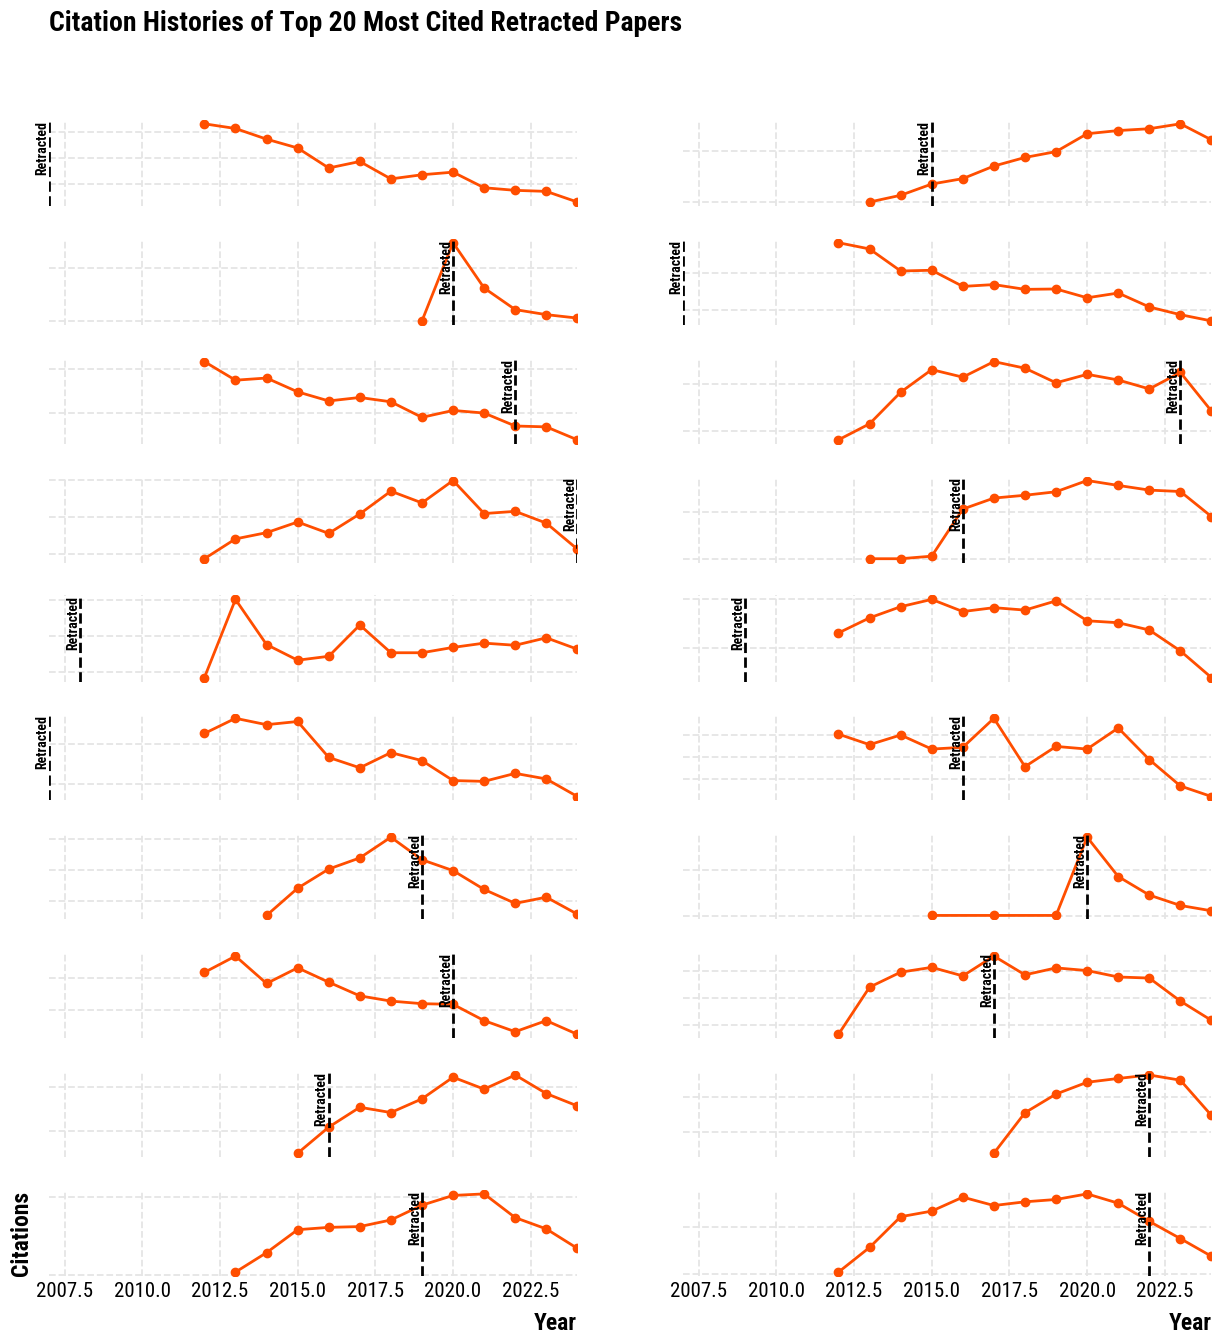

In [126]:
# Get top 20 most cited papers
top_20 = merged_df.nlargest(20, 'cited_by_count')

# Create figure first with extra space at top
fig = plt.figure(figsize=(15, 16))  # Slightly taller to accommodate title

# Create subplot grid with space for title
gs = fig.add_gridspec(11, 2, height_ratios=[0.5] + [1]*10)  # First row is shorter for title

# Create title axis
title_ax = fig.add_subplot(gs[0, :])
title_ax.set_title('Citation Histories of Top 20 Most Cited Retracted Papers', 
                   fontsize=20, pad=10)
title_ax.axis('off')  # Hide the axis

# Create subplots
axes = []
for i in range(1, 11):  # Start from second row
    for j in range(2):
        axes.append(fig.add_subplot(gs[i, j]))

axes = np.array(axes)

# Find global x-axis limits including both citation years and retraction years
all_years = []
retraction_years = []
for _, paper in top_20.iterrows():
    citation_history = pd.DataFrame(paper['counts_by_year'])
    all_years.extend(citation_history['year'])
    retraction_years.append(pd.to_datetime(paper['RetractionDate']).year)

x_min = min(min(all_years), min(retraction_years))
x_max = max(max(all_years), max(retraction_years))

# For each paper in top 20
for idx, (_, paper) in enumerate(top_20.iterrows()):
    # Convert citation history to DataFrame for easier plotting
    citation_history = pd.DataFrame(paper['counts_by_year'])
    
    # Get retraction year
    retraction_year = pd.to_datetime(paper['RetractionDate']).year
    
    # Plot on the corresponding subplot
    ax = axes[idx]
    ax.plot(citation_history['year'], citation_history['cited_by_count'], 
            marker='o', linewidth=2, color='#ff4e00')
    
    # Add retraction year line with label
    ax.axvline(x=retraction_year, color='black', linestyle='--', alpha=1., linewidth=2)
    ax.text(retraction_year, ax.get_ylim()[1], 'Retracted', 
            rotation=90, ha='right', va='top', fontweight='bold')
    
    # Remove y-axis numbers
    ax.set_yticklabels([])
    
    # Set consistent x-axis limits to include all retraction years
    ax.set_xlim(x_min, x_max)
    
    # Only show x-axis labels for the bottom plots
    if idx < len(axes)-2:  # All except last row
        ax.set_xticklabels([])
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Year')
    
    # Add y-axis label only to second-to-last plot on left side
    if idx == 18:  # Pre-final plot on left side
        ax.set_ylabel('Citations')

# Adjust layout with more space between subplots
plt.subplots_adjust(hspace=0.4)
plt.show()

In [109]:
top_15

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,retraction_date_column,publication_date_column,time_to_retraction,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,type_crossref,indexed_in,open_access,authorships,institution_assertions,countries_distinct_count,institutions_distinct_count,corresponding_author_ids,corresponding_institution_ids,apc_list,apc_paid,fwci,has_fulltext,cited_by_count,citation_normalized_percentile,cited_by_percentile_year,biblio,is_retracted,is_paratext,primary_topic,topics,keywords,concepts,mesh,locations_count,locations,best_oa_location,sustainable_development_goals,grants,datasets,versions,referenced_works_count,referenced_works,related_works,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date,fulltext_origin,is_authors_truncated,doi_to_merge
3604,54381,Pluripotency of mesenchymal stem cells derived...,(BLS) Biology - Cellular;,"Stem Cell Institute, University of Minnesota M...",Nature,Springer - Nature Publishing Group,United States,Yuehua Jiang;Balkrishna N Jahagirdar;R Lee Rei...,https://retractionwatch.com/2024/06/18/nature-...,Research Article;,6/14/2007 0:00,10.1038/nature05812,12077603.0,6/20/2002 0:00,10.1038/nature00870,12077603.0,Correction,+Concerns/Issues About Image;+Error in Text;+U...,No,see also: https://pubpeer.com/publications/DF9...,2007-06-14,2002-06-20,1820.0,https://openalex.org/W2158048826,https://doi.org/10.1038/nature00870,Pluripotency of mesenchymal stem cells derived...,Pluripotency of mesenchymal stem cells derived...,2002,2002-06-20,{'openalex': 'https://openalex.org/W2158048826...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,journal-article,"[crossref, pubmed]","{'is_oa': True, 'oa_status': 'green', 'oa_url'...","[{'author_position': 'first', 'author': {'id':...",[],1,2,[],[],"{'value': 9750, 'currency': 'EUR', 'value_usd'...",None,206.944,True,5691,"{'value': 0.999563, 'is_in_top_1_percent': Tru...","{'min': 99, 'max': 100}","{'volume': '418', 'issue': '6893', 'first_page...",False,False,"{'id': 'https://openalex.org/T10176', 'display...","[{'id': 'https://openalex.org/T10176', 'displa...",[{'id': 'https://openalex.org/keywords/mesench...,"[{'id': 'https://openalex.org/C86803240', 'wik...","[{'descriptor_ui': 'D000375', 'descriptor_name...",3,"[{'is_oa': False, 'landing_page_url': 'https:/...","{'is_oa': True, 'landing_page_url': 'https://l...","[{'id': 'https://metadata.un.org/sdg/3', 'disp...",[],[],[],52,"[https://openalex.org/W1520290955, https://ope...","[https://openalex.org/W2587293249, https://ope...","{'We': [0], 'report': [1], 'here': [2, 10], 't...",https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2024, 'cited_by_count': 31}, {'year'...",2024-10-31T18:31:38.791134,2016-06-24,pdf,NaN,10.1038/nature00870
30846,8987,DNA methylation age of human tissues and cell ...,(BLS) Biology - Molecular;(BLS) Genetics;,"Human Genetics, David Geffen School of Medicin...",Genome Biology,BioMed Central (BMC),United States,Steve Horvath,http://retractionwatch.com/2015/06/15/high-pro...,Research Article;,5/13/2015 0:00,10.1186/s13059-015-0649-6,25968125.0,12/10/2013 0:00,10.1186/gb-2013-14-10-r115,24138928.0,Correction,+Concerns/Issues About Data;+Error in Analyses...,No,NaN,2015-05-13,2013-12-10,519.0,https://openalex.org/W1974047233,https://doi.org/10.1186/gb-2013-14-10-r115,DNA methylation age of human tissues and cell ...,DNA methylation age of human tissues and cell ...,2013,2013-10-21,{'openalex': 'https://openalex.org/W1974047233...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,journal-article,"[crossref, pubmed]","{'is_oa': True, 'oa_status': 'hybrid', 'oa_url...","[{'author_position': 'first', 'author': {'id':...",[],1,1,[https://openalex.org/A5000192581],[https://opena